# Visualization of classification results
The three analyses - the benchmark, ROI-average, and cluster-average analysis - are visualized below.

In [1]:
# Importing packages
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from matplotlib import lines
from scipy.stats import linregress, ttest_1samp
import pandas as pd
import numpy as np
import os
from os.path import join as opj
import seaborn as sns

# Setting some global variables
colors = sns.color_palette()
home = os.path.expanduser('~')
resultsdir = opj(home, 'Dropbox', 'ResMas_UvA', 'Thesis', 'Git', 'Analysis_results')

## 1. Benchmark analysis

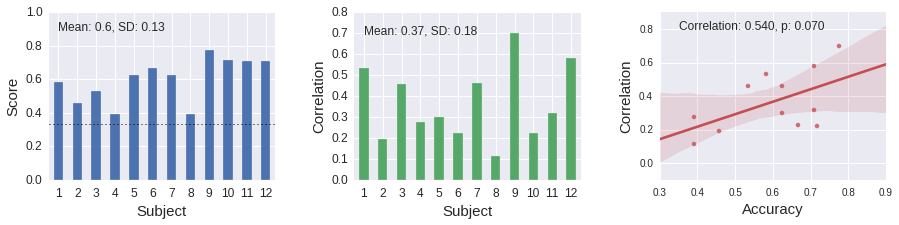

In [2]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'benchmark_results.csv')
data1 = pd.read_csv(filepath, sep=',', skiprows=22)
data1 = data1.dropna(how='any')
data1['fs_count'] = data1['fs_count'].astype(float)
data1['sub_name'] = np.arange(1, len(data1.index)+1)

# Some descriptives to include in plots
mean_score = np.round(data1['accuracy'].mean(), 2)
std_score = np.round(data1['accuracy'].std(), 2)
mean_feat = np.round(data1['fs_count'].mean(), 0)
std_feat = np.round(data1['fs_count'].std(), 0)
mean_corr = np.round(data1['corr_vox'].mean(), 2)
std_corr = np.round(data1['corr_vox'].std(), 2)

### Start plotting! ###
fig, axes = plt.subplots(1,3)

# Plot 1: Accuracy
data1.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(15, 3))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

# Plot 2: Correlations across features
data1.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

# Some tick parameters
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

# Plot 3: Correlation between accuracy and correlation between features
slope, intercept, r, p, stderr = linregress(data1['accuracy'], data1['corr_vox'])
axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data1, color=colors[2])
axes[2].set_xlabel('Accuracy', fontsize=15)
axes[2].set_ylabel('Correlation', fontsize=15)
axes[2].text(.35, 0.8, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

# Save plots
plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'benchmark_plot.png'), dpi=600, bbox_inches='tight')

### Statistics for benchmark analysis

In [50]:
# T-test of average feature correlation
t_val1, p_val1 = ttest_1samp(data1['corr_vox'], 0)
print "One-sample t-test (against 0) of average correlation of features yields: " \
"T-value = %.3f and p-value is %.5f" % (t_val1, p_val1)

# T-test of accuracy against chance
t_val2, p_val2 = ttest_1samp(data1['accuracy'], 1/3.0)
print "One-sample t-test of accuracy (against chance, 1/3) yields: " \
"T-value = %.3f and p-value is %.5f" % (t_val2, p_val2)


One-sample t-test (against 0) of average correlation of features yields: T-value = 7.066 and p-value is 0.00002
One-sample t-test of accuracy (against chance, 1/3) yields: T-value = 7.089 and p-value is 0.00002


## 2. ROI-average analysis


In [3]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'ROI_average_results.csv')
data2 = pd.read_csv(filepath, sep=',', skiprows=22)
data2 = data.dropna(how='any')
data2['fs_count'] = data2['fs_count'].astype(float)
data2['sub_name'] = np.arange(1, len(data2.index) + 1)

# Plotting accuracy and number of features
mean_score = np.round(data2['accuracy'].mean(), 2)
std_score = np.round(data2['accuracy'].std(), 2)
mean_feat = np.round(data2['fs_count'].mean(), 0)
std_feat = np.round(data2['fs_count'].std(), 0)
mean_corr = np.round(data2['corr_vox'].mean(), 2)
std_corr = np.round(data2['corr_vox'].std(), 2)

fig, axes = plt.subplots(1,2)

data.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(10, 2.5))

axes[0].axhline(y=0.3333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

'''
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %s, SD: %s' % (mean_feat, std_feat), size=12)
'''

data2.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'ROI_average_plot.png'), dpi=600, bbox_inches='tight')

#slope, intercept, r, p, stderr = linregress(data['accuracy'], data['corr_vox'])
#axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data, color=colors[2])
#axes[2].set_xlabel('Accuracy', fontsize=15)
#axes[2].set_ylabel('Correlation', fontsize=15)
#axes[2].text(.35, 0.7, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

NameError: name 'data' is not defined

In [4]:
# T-test of average feature correlation
t_val1, p_val1 = ttest_1samp(data2['corr_vox'], 0)
print "One-sample t-test (against 0) of average correlation of features yields: " \
"T-value = %.3f and p-value is %.5f" % (t_val1, p_val1)

# T-test of accuracy against chance
t_val2, p_val2 = ttest_1samp(data2['accuracy'], 1/3.0)
print "One-sample t-test of accuracy (against chance, 1/3) yields: " \
"T-value = %.3f and p-value is %.5f" % (t_val2, p_val2)

print "mean features: %.3f, SD features: %.3f" % (np.mean(data2['fs_count']), np.std(data2['fs_count']))
print "percent reduction: %.3f" % ((1042-33.566) / 1042.0)

One-sample t-test (against 0) of average correlation of features yields: T-value = 38.746 and p-value is 0.00000
One-sample t-test of accuracy (against chance, 1/3) yields: T-value = 8.771 and p-value is 0.00000
mean features: 33.566, SD features: 3.305
percent reduction: 0.968


## 3. Cluster-average

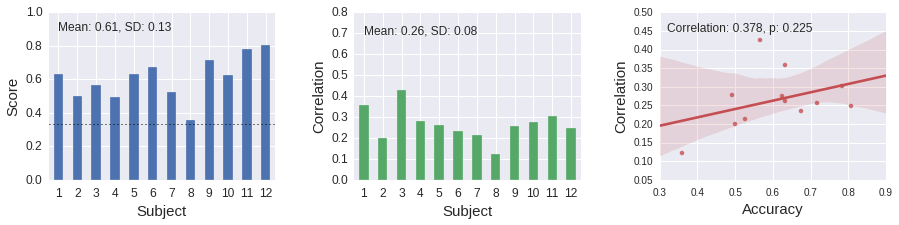

In [5]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'Cluster_average_results.csv')
data3 = pd.read_csv(filepath, sep=',', skiprows=22)
data3 = data3.dropna(how='any')
data3['fs_count'] = data3['fs_count'].astype(float)
data3['sub_name'] = np.arange(1, len(data3.index) + 1)

# Plotting accuracy and number of features
mean_score = np.round(data3['accuracy'].mean(), 2)
std_score = np.round(data3['accuracy'].std(), 2)
mean_feat = np.round(data3['fs_count'].mean(), 0)
std_feat = np.round(data3['fs_count'].std(), 0)
mean_corr = np.round(data3['corr_vox'].mean(), 2)
std_corr = np.round(data3['corr_vox'].std(), 2)

fig, axes = plt.subplots(1,3)

data3.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(15, 3))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

'''
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %s, SD: %s' % (mean_feat, std_feat), size=12)
'''

data3.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

slope, intercept, r, p, stderr = linregress(data3['accuracy'], data3['corr_vox'])
axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data3, color=colors[2])
axes[2].set_xlabel('Accuracy', fontsize=15)
axes[2].set_ylabel('Correlation', fontsize=15)
axes[2].text(.32, 0.45, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'Cluster_average_plot.png'), dpi=600, bbox_inches='tight')


In [66]:
t, p = ttest_1samp(data3['accuracy'], .333333)
print "T-value = %.3f and p-value is %.3f" % (t, p)

print "mean features: %.3f and std features: %.3f" % (data3['fs_count'].mean(), data3['fs_count'].std())
print "reduction: %.3f" % ((1024-data3['fs_count'].mean())/1024)

T-value = 7.388 and p-value is 0.000
mean features: 27.135 and std features: 4.070
reduction: 0.974


## 4. Comparison of analyses

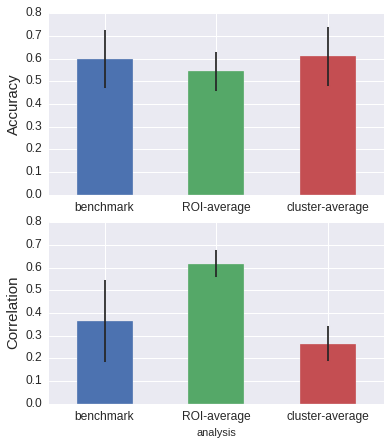

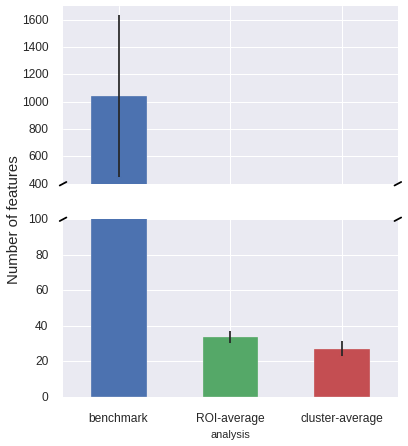

In [22]:
data4 = pd.DataFrame({'analysis': ['benchmark', 'ROI-average', 'cluster-average'],
                      'acc_av': [data1['accuracy'].mean(), data2['accuracy'].mean(), data3['accuracy'].mean()],
                      'acc_std': [data1['accuracy'].std(), data2['accuracy'].std(), data3['accuracy'].std()],
                      'corr_av': [data1['corr_vox'].mean(), data2['corr_vox'].mean(), data3['corr_vox'].mean()],
                      'corr_std': [data1['corr_vox'].std(), data2['corr_vox'].std(), data3['corr_vox'].std()],
                      'feat_av': [data1['fs_count'].mean(), data2['fs_count'].mean(), data3['fs_count'].mean()],
                      'feat_std': [data1['fs_count'].std(), data2['fs_count'].std(), data3['fs_count'].std()]})

fig, axes = plt.subplots(2,1)
data4.plot(kind='bar', x='analysis', y='acc_av', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, color=colors, yerr='acc_std', ax=axes[0], figsize=(6, 7))
data4.plot(kind='bar', x='analysis', y='corr_av', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, color=colors, yerr='corr_std', ax=axes[1])

#axes[0].set_xticklabels([])
axes[0].set_xlabel('')
axes[0].set_ylabel('Accuracy', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)

plt.subplots_adjust(hspace=0.15)
plt.savefig(opj(resultsdir, 'overview1.png'), dpi=600, bbox_inches='tight')

### n-features ###
fig, axis = plt.subplots(2, 1, sharex=True)
data4.plot(kind='bar', x='analysis', y='feat_av', legend=False, 
              rot=0, ylim=(0, 100), fontsize=12, color=colors, yerr='feat_std', ax=axis[0], figsize=(6,7))
data4.plot(kind='bar', x='analysis', y='feat_av', legend=False, 
              rot=0, ylim=(0, 100), fontsize=12, color=colors, yerr='feat_std', ax=axis[1])

axis[0].set_ylim(400, 1700)
axis[0].set_xlabel('')
axis[1].set_ylim(0, 100)
axis[1].legend().set_visible(False)

axis[0].spines['bottom'].set_visible(False)
axis[1].spines['top'].set_visible(False)
axis[0].xaxis.tick_top()
axis[0].tick_params(labeltop='off')
axis[1].xaxis.tick_bottom()

d = .01
kwargs = dict(transform=axis[0].transAxes, color='k', clip_on=False)
axis[0].plot((-d,+d),(-d,+d), **kwargs)
axis[0].plot((1-d,1+d),(-d,+d), **kwargs)
kwargs.update(transform=axis[1].transAxes)
axis[1].plot((-d,+d),(1-d,1+d), **kwargs)
axis[1].plot((1-d,1+d),(1-d,1+d), **kwargs)

axis[0].tick_params(direction='out', pad=15)
axis[1].tick_params(direction='out', pad=15)
axis[1].set_ylabel('Number of features', fontsize=15)
axis[1].yaxis.set_label_coords(-.125, 1)


plt.savefig(opj(resultsdir, 'overview2.png'), dpi=600, bbox_inches='tight')


In [27]:
from scipy.stats import ttest_ind, f_oneway
f2, p_anova2 = f_oneway(data1['accuracy'], data2['accuracy'], data3['accuracy'])
f, p_anova = f_oneway(data1['corr_vox'], data2['corr_vox'], data3['corr_vox'])

t, p_tt = ttest_ind(data1['corr_vox'], data3['corr_vox'])
print t, p_tt

1.78474651951 0.0881000823609
